In [159]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import ttest_ind

In [70]:
P_advanced = pd.read_excel("P_advanced.xls")
C_advanced = pd.read_excel("C_advanced.xls")
B_advanced = pd.read_excel("B_advanced.xls")
D_advanced = pd.read_excel("D_advanced.xls")
WV_advanced = pd.read_excel("WV_advanced.xls")


In [71]:
columns_P= P_advanced.iloc[0]
columns_C = C_advanced.iloc[0]
columns_B = B_advanced.iloc[0]
columns_D = D_advanced.iloc[0]
columns_WV = WV_advanced.iloc[0]

In [72]:
P_advanced.columns = columns_P
C_advanced.columns = columns_C
B_advanced.columns = columns_B
D_advanced.columns = columns_D
WV_advanced.columns = columns_WV

In [73]:
P_advanced.head()

,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,NaN,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA
0,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,NaN,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA
1,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,NaN,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176
2,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,NaN,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183
3,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,NaN,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164
4,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,NaN,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177


In [74]:
P_advanced = P_advanced.drop([0])
C_advanced = C_advanced.drop([0])
B_advanced = B_advanced.drop([0])
D_advanced = D_advanced.drop([0])
WV_advanced = WV_advanced.drop([0])

In [75]:
P_advanced.head()

,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,NaN,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA
1,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,NaN,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176
2,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,NaN,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183
3,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,NaN,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164
4,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,NaN,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177
5,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,NaN,0.298,14.2,32.4,0.228,NaN,0.5,12.8,72.4,0.269


In [76]:
index = list(range(len(P_advanced)))
P_advanced = P_advanced.reset_index()
index = list(range(len(C_advanced)))
C_advanced = C_advanced.reset_index()
index = list(range(len(B_advanced)))
B_advanced = B_advanced.reset_index()
index = list(range(len(D_advanced)))
D_advanced = D_advanced.reset_index()
index = list(range(len(WV_advanced)))
WV_advanced = WV_advanced.reset_index()

In [77]:
P_advanced.head()

,index,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,...,NaN,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA
0,1,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,...,NaN,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176
1,2,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,...,NaN,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183
2,3,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,...,NaN,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164
3,4,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,...,NaN,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177
4,5,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,...,NaN,0.298,14.2,32.4,0.228,NaN,0.5,12.8,72.4,0.269


In [78]:
P_advanced = P_advanced.drop(columns = "index")
C_advanced = C_advanced.drop(columns = "index")
B_advanced = B_advanced.drop(columns = "index")
D_advanced = D_advanced.drop(columns = "index")
WV_advanced = WV_advanced.drop(columns = "index")

In [79]:
P_advanced["Team"] = "P"

In [80]:
P_advanced.head()

,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,Team
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176,P
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183,P
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164,P
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177,P
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,NaN,0.5,12.8,72.4,0.269,P


In [81]:
C_advanced["Team"] = "C"
B_advanced["Team"] = "B"
D_advanced["Team"] = "D"
WV_advanced["Team"] = "WV"

In [82]:
double = P_advanced.append(C_advanced)
double

,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,Team
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176,P
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183,P
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164,P
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177,P
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,NaN,0.5,12.8,72.4,0.269,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,2019-03-09 00:00:00,NaN,DePaul,W,91,78,124.7,106.8,73.2,...,0.72,15.9,12.5,0.38,NaN,0.525,17.6,66.7,0.23,C
31,32,2019-03-14 00:00:00,N,Xavier,L,61,63,92.4,95.5,66.3,...,0.483,9.9,15.6,0.05,NaN,0.467,12,75,0.117,C
32,33,2019-03-19 00:00:00,NaN,Loyola (IL),W,70,61,101.4,88.4,69.1,...,0.573,18,15.4,0.127,NaN,0.518,19.5,92.6,0.073,C
33,34,2019-03-22 00:00:00,NaN,Memphis,W,79,67,103.9,88.2,75.9,...,0.557,17.6,29,0.18,NaN,0.475,18.4,81.8,0.148,C


In [83]:
print(len(P_advanced.columns))
print(len(C_advanced.columns))
print(len(B_advanced.columns))
print(len(D_advanced.columns))
print(len(WV_advanced.columns))

28
28
28
28
28


In [24]:
B_advanced.columns

Index([   'G', 'Date',    nan,  'Opp',  'W/L',   'Tm',  'Opp',   'FG',  'FGA',
        'FG%',   '3P',  '3PA',  '3P%',   'FT',  'FTA',  'FT%',  'ORB',  'TRB',
        'AST',  'STL',  'BLK',  'TOV',   'PF',    nan,   'FG',  'FGA',  'FG%',
         '3P',  '3PA',  '3P%',   'FT',  'FTA',  'FT%',  'ORB',  'TRB',  'AST',
        'STL',  'BLK',  'TOV',   'PF', 'Team'],
      dtype='object', name=0)

In [84]:
advanced_combo = P_advanced.append([C_advanced, B_advanced, D_advanced, WV_advanced])

In [85]:
advanced_combo.head()

,G,Date,NaN,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,Team
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176,P
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183,P
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164,P
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177,P
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,NaN,0.5,12.8,72.4,0.269,P


In [40]:
advanced_combo.columns

Index([     'G',   'Date',      nan,    'Opp',    'W/L',     'Tm',    'Opp',
         'ORtg',   'DRtg',   'Pace',    'FTr',   '3PAr',    'TS%',   'TRB%',
         'AST%',   'STL%',   'BLK%',      nan,   'eFG%',   'TOV%',   'ORB%',
       'FT/FGA',      nan,   'eFG%',   'TOV%',   'DRB%', 'FT/FGA',   'Team'],
      dtype='object', name=0)

In [86]:
advanced_combo.columns.values[2] = "Game Site"


In [42]:
advanced_combo.head()

,G,Date,Game Site,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,Team
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,NaN,0.569,17.3,70.4,0.176,P
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,NaN,0.6,18.8,55.6,0.183,P
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,NaN,0.418,15.3,74.4,0.164,P
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,NaN,0.452,14.9,74.2,0.177,P
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,NaN,0.5,12.8,72.4,0.269,P


In [87]:
advanced_combo.columns.values[17]= "empty"
advanced_combo.columns

Index([        'G',      'Date', 'Game Site',       'Opp',       'W/L',
              'Tm',       'Opp',      'ORtg',      'DRtg',      'Pace',
             'FTr',      '3PAr',       'TS%',      'TRB%',      'AST%',
            'STL%',      'BLK%',     'empty',      'eFG%',      'TOV%',
            'ORB%',    'FT/FGA',         nan,      'eFG%',      'TOV%',
            'DRB%',    'FT/FGA',      'Team'],
      dtype='object', name=0)

In [88]:
advanced_combo = advanced_combo.drop(columns = "empty")


In [48]:
advanced_combo.columns

Index([        'G',      'Date', 'Game Site',       'Opp',       'W/L',
              'Tm',       'Opp',      'ORtg',      'DRtg',      'Pace',
             'FTr',      '3PAr',       'TS%',      'TRB%',      'AST%',
            'STL%',      'BLK%',      'eFG%',      'TOV%',      'ORB%',
          'FT/FGA',         nan,      'eFG%',      'TOV%',      'DRB%',
          'FT/FGA',      'Team'],
      dtype='object', name=0)

In [89]:
advanced_combo.columns.values[21]= "empty"

In [50]:
advanced_combo.columns

Index([        'G',      'Date', 'Game Site',       'Opp',       'W/L',
              'Tm',       'Opp',      'ORtg',      'DRtg',      'Pace',
             'FTr',      '3PAr',       'TS%',      'TRB%',      'AST%',
            'STL%',      'BLK%',      'eFG%',      'TOV%',      'ORB%',
          'FT/FGA',     'empty',      'eFG%',      'TOV%',      'DRB%',
          'FT/FGA',      'Team'],
      dtype='object', name=0)

In [90]:
advanced_combo = advanced_combo.drop(columns = "empty")


In [91]:
advanced_combo.columns

Index(['G', 'Date', 'Game Site', 'Opp', 'W/L', 'Tm', 'Opp', 'ORtg', 'DRtg',
       'Pace', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'eFG%', 'TOV%', 'DRB%', 'FT/FGA', 'Team'],
      dtype='object', name=0)

In [92]:
i = 21
while(i<len(advanced_combo.columns.values)):
    advanced_combo.columns.values[i] = "O"+str(advanced_combo.columns.values[i])
    i+=1

In [93]:
advanced_combo.columns

Index(['G', 'Date', 'Game Site', 'Opp', 'W/L', 'Tm', 'Opp', 'ORtg', 'DRtg',
       'Pace', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'OeFG%', 'OTOV%', 'ODRB%', 'OFT/FGA',
       'OTeam'],
      dtype='object', name=0)

In [98]:
advanced_combo

,G,Date,Game Site,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,OTeam,numeric
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,0.569,17.3,70.4,0.176,P,0
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,0.6,18.8,55.6,0.183,P,0
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,0.418,15.3,74.4,0.164,P,0
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,0.452,14.9,74.2,0.177,P,0
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,0.5,12.8,72.4,0.269,P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,32,2019-03-13 00:00:00,N,Oklahoma,W,72,71,101.4,100,70.7,...,0.444,10.4,35.6,0.127,0.484,10.5,85.7,0.177,WV,0
32,33,2019-03-14 00:00:00,N,Texas Tech,W,79,74,103.9,97.4,75.5,...,0.44,18,45.9,0.299,0.509,18.6,78.1,0.281,WV,0
33,34,2019-03-15 00:00:00,N,Kansas,L,74,88,94.9,112.8,78.3,...,0.478,12.5,22.5,0.116,0.587,18.5,67.9,0.222,WV,0
34,35,2019-03-20 00:00:00,NaN,Grand Canyon,W,77,63,102.7,84,74.9,...,0.451,12.1,31.7,0.183,0.476,16.6,83.3,0.065,WV,0


In [99]:
index = list(range(len(advanced_combo)))
advanced_combo = advanced_combo.reset_index()


In [100]:
advanced_combo = advanced_combo.drop(columns="index")

In [103]:
advanced_combo["numeric"] = [None]*len(advanced_combo)
advanced_combo

,G,Date,Game Site,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,OTeam,numeric
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,0.569,17.3,70.4,0.176,P,None
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,0.6,18.8,55.6,0.183,P,None
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,0.418,15.3,74.4,0.164,P,None
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,0.452,14.9,74.2,0.177,P,None
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,0.5,12.8,72.4,0.269,P,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,32,2019-03-13 00:00:00,N,Oklahoma,W,72,71,101.4,100,70.7,...,0.444,10.4,35.6,0.127,0.484,10.5,85.7,0.177,WV,None
167,33,2019-03-14 00:00:00,N,Texas Tech,W,79,74,103.9,97.4,75.5,...,0.44,18,45.9,0.299,0.509,18.6,78.1,0.281,WV,None
168,34,2019-03-15 00:00:00,N,Kansas,L,74,88,94.9,112.8,78.3,...,0.478,12.5,22.5,0.116,0.587,18.5,67.9,0.222,WV,None
169,35,2019-03-20 00:00:00,NaN,Grand Canyon,W,77,63,102.7,84,74.9,...,0.451,12.1,31.7,0.183,0.476,16.6,83.3,0.065,WV,None


In [104]:
for i in range(len(advanced_combo)):
    if "W" in advanced_combo["W/L"][i]:
        advanced_combo.loc[i,"numeric"] = 1
    else:
        advanced_combo.loc[i,"numeric"] = 0

In [105]:
advanced_combo

,G,Date,Game Site,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,OTeam,numeric
0,1,2018-11-06 00:00:00,NaN,Siena,W,77,67,128.3,111.7,60.3,...,0.67,18.8,41.7,0.113,0.569,17.3,70.4,0.176,P,1
1,2,2018-11-09 00:00:00,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,0.6,18.8,55.6,0.183,P,0
2,3,2018-11-13 00:00:00,NaN,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,0.418,15.3,74.4,0.164,P,1
3,4,2018-11-17 00:00:00,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.5,0.452,14.9,74.2,0.177,P,1
4,5,2018-11-18 00:00:00,N,Michigan,L,47,66,73.4,103.1,64,...,0.298,14.2,32.4,0.228,0.5,12.8,72.4,0.269,P,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,32,2019-03-13 00:00:00,N,Oklahoma,W,72,71,101.4,100,70.7,...,0.444,10.4,35.6,0.127,0.484,10.5,85.7,0.177,WV,1
167,33,2019-03-14 00:00:00,N,Texas Tech,W,79,74,103.9,97.4,75.5,...,0.44,18,45.9,0.299,0.509,18.6,78.1,0.281,WV,1
168,34,2019-03-15 00:00:00,N,Kansas,L,74,88,94.9,112.8,78.3,...,0.478,12.5,22.5,0.116,0.587,18.5,67.9,0.222,WV,0
169,35,2019-03-20 00:00:00,NaN,Grand Canyon,W,77,63,102.7,84,74.9,...,0.451,12.1,31.7,0.183,0.476,16.6,83.3,0.065,WV,1


In [107]:
advanced_combo = advanced_combo.fillna("H")

In [108]:
advanced_combo.head()

,G,Date,Game Site,Opp,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,OTeam,numeric
0,1,2018-11-06,H,Siena,W,77,67,128.3,111.7,60.3,...,0.670,18.8,41.7,0.113,0.569,17.3,70.4,0.176,P,1
1,2,2018-11-09,N,Wichita State,L,80,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,0.600,18.8,55.6,0.183,P,0
2,3,2018-11-13,H,Holy Cross,W,70,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,0.418,15.3,74.4,0.164,P,1
3,4,2018-11-17,N,South Carolina,W,76,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.500,0.452,14.9,74.2,0.177,P,1
4,5,2018-11-18,N,Michigan,L,47,66,73.4,103.1,64.0,...,0.298,14.2,32.4,0.228,0.500,12.8,72.4,0.269,P,0


In [110]:
advanced_combo.columns.values[3] = "Opp_name"
advanced_combo.head()

,G,Date,Game Site,Opp_name,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,OTeam,numeric
0,1,2018-11-06,H,Siena,W,77.0,67,128.3,111.7,60.3,...,0.670,18.8,41.7,0.113,0.569,17.3,70.4,0.176,P,1.0
1,2,2018-11-09,N,Wichita State,L,80.0,83,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,0.600,18.8,55.6,0.183,P,0.0
2,3,2018-11-13,H,Holy Cross,W,70.0,61,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,0.418,15.3,74.4,0.164,P,1.0
3,4,2018-11-17,N,South Carolina,W,76.0,67,104.1,91.8,73.4,...,0.429,13.2,28.1,0.500,0.452,14.9,74.2,0.177,P,1.0
4,5,2018-11-18,N,Michigan,L,47.0,66,73.4,103.1,64.0,...,0.298,14.2,32.4,0.228,0.500,12.8,72.4,0.269,P,0.0


In [111]:
advanced_combo["numeric"] = advanced_combo["numeric"].astype(float)
advanced_combo["Tm"] = advanced_combo["Tm"].astype(float)
advanced_combo["Opp"] = advanced_combo["Opp"].astype(float)
advanced_combo["ORtg"] = advanced_combo["ORtg"].astype(float)
advanced_combo["DRtg"] = advanced_combo["DRtg"].astype(float)
advanced_combo["Pace"] = advanced_combo["Pace"].astype(float)
advanced_combo["FTr"] = advanced_combo["FTr"].astype(float)
advanced_combo["3PAr"] = advanced_combo["3PAr"].astype(float)
advanced_combo["TS%"] = advanced_combo["TS%"].astype(float)
advanced_combo["TRB%"] = advanced_combo["TRB%"].astype(float)
advanced_combo["AST%"] = advanced_combo["AST%"].astype(float)
advanced_combo["STL%"] = advanced_combo["STL%"].astype(float)
advanced_combo["BLK%"] = advanced_combo["BLK%"].astype(float)
advanced_combo["eFG%"] = advanced_combo["eFG%"].astype(float)
advanced_combo["TOV%"] = advanced_combo["TOV%"].astype(float)
advanced_combo["ORB%"] = advanced_combo["ORB%"].astype(float)
advanced_combo["FT/FGA"] = advanced_combo["FT/FGA"].astype(float)
advanced_combo["OeFG%"] = advanced_combo["OeFG%"].astype(float)
advanced_combo["OTOV%"] = advanced_combo["OTOV%"].astype(float)
advanced_combo["ODRB%"] = advanced_combo["ODRB%"].astype(float)
advanced_combo["OFT/FGA"] = advanced_combo["OFT/FGA"].astype(float)

In [112]:
advanced_combo.head()

,G,Date,Game Site,Opp_name,W/L,Tm,Opp,ORtg,DRtg,Pace,...,eFG%,TOV%,ORB%,FT/FGA,OeFG%,OTOV%,ODRB%,OFT/FGA,OTeam,numeric
0,1,2018-11-06,H,Siena,W,77.0,67.0,128.3,111.7,60.3,...,0.670,18.8,41.7,0.113,0.569,17.3,70.4,0.176,P,1.0
1,2,2018-11-09,N,Wichita State,L,80.0,83.0,109.6,113.7,73.2,...,0.558,17.2,42.4,0.217,0.600,18.8,55.6,0.183,P,0.0
2,3,2018-11-13,H,Holy Cross,W,70.0,61.0,101.4,88.4,68.9,...,0.508,16.1,30.6,0.169,0.418,15.3,74.4,0.164,P,1.0
3,4,2018-11-17,N,South Carolina,W,76.0,67.0,104.1,91.8,73.4,...,0.429,13.2,28.1,0.500,0.452,14.9,74.2,0.177,P,1.0
4,5,2018-11-18,N,Michigan,L,47.0,66.0,73.4,103.1,64.0,...,0.298,14.2,32.4,0.228,0.500,12.8,72.4,0.269,P,0.0


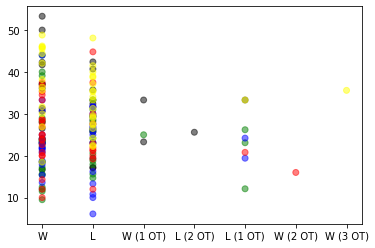

In [117]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["ORB%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
plt.show()

In [118]:
fit = LogisticRegression().fit(advanced_combo[["ORB%"]],advanced_combo["numeric"])

In [119]:
fit.score(advanced_combo[["ORB%"]],advanced_combo["numeric"])

0.5029239766081871

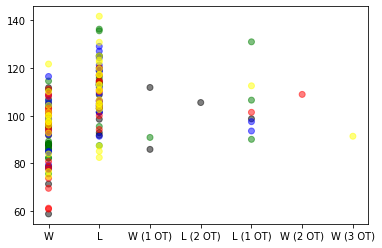

In [120]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["DRtg"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
plt.show()

In [121]:
fit2 = LogisticRegression().fit(advanced_combo[["DRtg"]],advanced_combo["numeric"])

In [122]:
fit2.score(advanced_combo[["DRtg"]],advanced_combo["numeric"])

0.7602339181286549

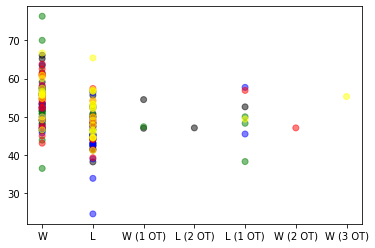

In [123]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["W/L"],y=advanced_combo["TRB%"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
plt.show()

In [124]:
fit3 = LogisticRegression().fit(advanced_combo[["TRB%"]],advanced_combo["numeric"])

In [125]:
fit3.score(advanced_combo[["TRB%"]],advanced_combo["numeric"])

0.7017543859649122

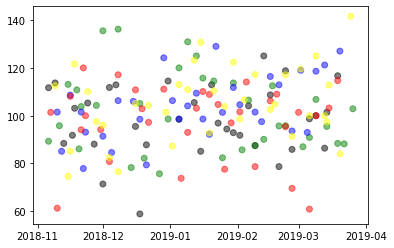

In [126]:
colors = {"P":"black","D":"red","B":"blue","C":"green","WV":"yellow"}
ax=plt.subplot()
ax.scatter(x=advanced_combo["Date"],y=advanced_combo["DRtg"],c=advanced_combo["OTeam"].map(colors), alpha = .5)
plt.show()

In [131]:
D_train, D_test, numeric_train, numeric_test = train_test_split(advanced_combo[["DRtg"]], advanced_combo["numeric"], test_size = .2, random_state = 15)


In [132]:
D_test = D_test.reset_index()
D_train = D_train.reset_index()
numeric_test = numeric_test.reset_index()
numeric_train = numeric_train.reset_index()

In [143]:
correct = 0
prediction = fit2.predict(D_test[["DRtg"]])
reality = numeric_test.loc[:,"numeric"]
for i in range(len(prediction)):
    if prediction[i] == reality[i]: 
        correct += 1
print("The prediction accuracy is {:.1}".format(correct/len(prediction)))  

The prediction accuracy is 0.8


In [144]:
correct = 0
prediction2 = fit2.predict(D_train[["DRtg"]])
reality2 = numeric_train.loc[:,"numeric"]
for i in range(len(prediction)):
    if prediction2[i] == reality2[i]: 
        correct += 1
print("The prediction accuracy is {:.1}".format(correct/len(prediction)))  

The prediction accuracy is 0.7


In [139]:
advanced_combo[["numeric","TRB%"]].corr()

,numeric,TRB%
0,,
numeric,1.000000,0.454691
TRB%,0.454691,1.000000


In [151]:
fit3.coef_

array([[0.17985684]])

In [152]:
fit2.coef_

array([[-0.11571597]])

In [154]:
players = pd.read_excel("p-players2019.xls")

In [155]:
players

,Rk,Player,G,GS,MP,PER,TS%,eFG%,3PAr,FTr,...,USG%,Unnamed: 19,OWS,DWS,WS,WS/40,Unnamed: 24,OBPM,DBPM,BPM
0,1,David Duke,31,31,997,16.2,0.542,0.483,0.350,0.423,...,19.9,NaN,1.8,1.7,3.5,0.142,NaN,2.1,3.6,5.7
1,2,Alpha Diallo,31,30,1013,18.8,0.489,0.455,0.257,0.406,...,25.6,NaN,1.3,2.0,3.3,0.129,NaN,3.2,2.6,5.8
2,3,Luwane Pipkins,31,25,820,16.1,0.533,0.475,0.663,0.297,...,22.1,NaN,1.5,1.3,2.8,0.139,NaN,2.8,2.3,5.1
3,4,Kalif Young,31,19,616,16.3,0.533,0.524,0.016,0.398,...,12.8,NaN,1.2,1.1,2.3,0.151,NaN,1.1,3.1,4.2
4,5,Nate Watson,27,13,510,21.7,0.527,0.511,0.000,0.489,...,24.5,NaN,1.3,0.8,2.1,0.165,NaN,3.2,1.1,4.3
5,6,Emmitt Holt,27,9,412,17.0,0.553,0.515,0.323,0.374,...,15.4,NaN,0.9,0.7,1.6,0.152,NaN,2.7,1.5,4.2
6,7,A.J. Reeves,28,16,613,12.1,0.494,0.474,0.584,0.205,...,19.2,NaN,0.5,1.0,1.5,0.098,NaN,1.2,1.9,3.1
7,8,Maliek White,30,6,774,8.9,0.455,0.414,0.504,0.281,...,19.6,NaN,0.2,1.1,1.3,0.066,NaN,-1.6,1.9,0.3
8,9,Greg Gantt,27,5,338,10.7,0.515,0.483,0.345,0.328,...,12.4,NaN,0.2,0.6,0.8,0.095,NaN,-1.6,3.8,2.2
9,10,Andrew Fonts,12,0,20,12.2,0.455,0.375,0.875,0.500,...,26.3,NaN,0.0,0.0,0.1,0.137,NaN,-4.5,0.9,-3.6


In [156]:
players["rebound rank"] = players["TRB%"].rank()

In [158]:
players

,Rk,Player,G,GS,MP,PER,TS%,eFG%,3PAr,FTr,...,Unnamed: 19,OWS,DWS,WS,WS/40,Unnamed: 24,OBPM,DBPM,BPM,rebound rank
0,1,David Duke,31,31,997,16.2,0.542,0.483,0.350,0.423,...,NaN,1.8,1.7,3.5,0.142,NaN,2.1,3.6,5.7,5.0
1,2,Alpha Diallo,31,30,1013,18.8,0.489,0.455,0.257,0.406,...,NaN,1.3,2.0,3.3,0.129,NaN,3.2,2.6,5.8,10.0
2,3,Luwane Pipkins,31,25,820,16.1,0.533,0.475,0.663,0.297,...,NaN,1.5,1.3,2.8,0.139,NaN,2.8,2.3,5.1,3.0
3,4,Kalif Young,31,19,616,16.3,0.533,0.524,0.016,0.398,...,NaN,1.2,1.1,2.3,0.151,NaN,1.1,3.1,4.2,13.0
4,5,Nate Watson,27,13,510,21.7,0.527,0.511,0.000,0.489,...,NaN,1.3,0.8,2.1,0.165,NaN,3.2,1.1,4.3,12.0
5,6,Emmitt Holt,27,9,412,17.0,0.553,0.515,0.323,0.374,...,NaN,0.9,0.7,1.6,0.152,NaN,2.7,1.5,4.2,11.0
6,7,A.J. Reeves,28,16,613,12.1,0.494,0.474,0.584,0.205,...,NaN,0.5,1.0,1.5,0.098,NaN,1.2,1.9,3.1,6.0
7,8,Maliek White,30,6,774,8.9,0.455,0.414,0.504,0.281,...,NaN,0.2,1.1,1.3,0.066,NaN,-1.6,1.9,0.3,1.0
8,9,Greg Gantt,27,5,338,10.7,0.515,0.483,0.345,0.328,...,NaN,0.2,0.6,0.8,0.095,NaN,-1.6,3.8,2.2,7.0
9,10,Andrew Fonts,12,0,20,12.2,0.455,0.375,0.875,0.500,...,NaN,0.0,0.0,0.1,0.137,NaN,-4.5,0.9,-3.6,2.0


In [166]:
rebounders = players[players["rebound rank"]>=10]

In [167]:
rebounders

,Rk,Player,G,GS,MP,PER,TS%,eFG%,3PAr,FTr,...,Unnamed: 19,OWS,DWS,WS,WS/40,Unnamed: 24,OBPM,DBPM,BPM,rebound rank
1,2,Alpha Diallo,31,30,1013,18.8,0.489,0.455,0.257,0.406,...,NaN,1.3,2.0,3.3,0.129,NaN,3.2,2.6,5.8,10.0
3,4,Kalif Young,31,19,616,16.3,0.533,0.524,0.016,0.398,...,NaN,1.2,1.1,2.3,0.151,NaN,1.1,3.1,4.2,13.0
4,5,Nate Watson,27,13,510,21.7,0.527,0.511,0.000,0.489,...,NaN,1.3,0.8,2.1,0.165,NaN,3.2,1.1,4.3,12.0
5,6,Emmitt Holt,27,9,412,17.0,0.553,0.515,0.323,0.374,...,NaN,0.9,0.7,1.6,0.152,NaN,2.7,1.5,4.2,11.0


In [188]:
AD_reb, KY_reb, NW_reb, EH_reb = rebounders["TRB%"]

In [172]:
AD_avg = 12.1

In [173]:
KY_avg = 14.1

In [174]:
NW_avg = 11.6

In [205]:
EH_avg = 12.5 

In [206]:
AD_games = 130/4
AD_games

32.5

In [181]:
NW_games = 96/3
NW_games

32.0

In [207]:
EH_games = 94/4
EH_games

23.5

In [185]:
AD_season_mean = np.zeros(1000)
for i in range(1000):
    AD_season_mean[i]=np.random.poisson(AD_avg,size = int(AD_games)).mean()

In [186]:
NW_season_mean = np.zeros(1000)
for i in range(1000):
    NW_season_mean[i]=np.random.poisson(NW_avg,size=int(NW_games)).mean()


In [208]:
EH_season_mean = np.zeros(1000)
for i in range(1000):
    EH_season_mean[i]=np.random.poisson(EH_avg,size=int(EH_games)).mean()

<function matplotlib.pyplot.show(*args, **kw)>

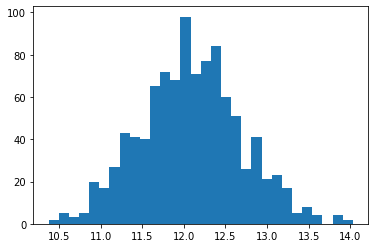

In [191]:
plt.hist(AD_season_mean,bins=30)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

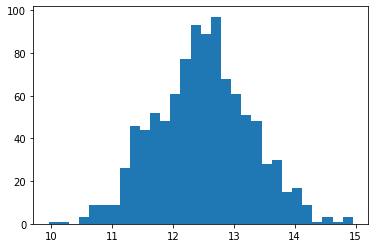

In [209]:
plt.hist(EH_season_mean,bins=30)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

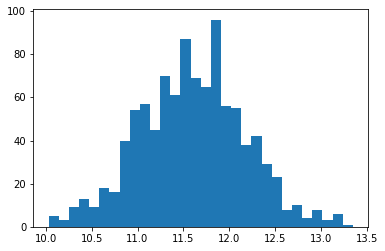

In [193]:
plt.hist(NW_season_mean,bins=30)
plt.show

In [196]:
AD_sd = np.sqrt(AD_avg)/int(AD_games)

In [197]:
AD_avg+(AD_sd*3)

12.426109883704864

In [203]:
EH_sd = np.sqrt(EH_avg)/int(EH_games)

In [211]:
EH_avg+(EH_sd*3)

12.948058192277852

In [212]:
NW_sd = np.sqrt(NW_avg)/int(NW_games)
NW_avg+(NW_sd*3)

11.91930099436112